In [2]:
!lscpu

Architecture:            x86_64
  CPU op-mode(s):        32-bit, 64-bit
  Address sizes:         48 bits physical, 48 bits virtual
  Byte Order:            Little Endian
CPU(s):                  12
  On-line CPU(s) list:   0-11
Vendor ID:               AuthenticAMD
  Model name:            AMD Ryzen 5 5500U with Radeon Graphics
    CPU family:          23
    Model:               104
    Thread(s) per core:  2
    Core(s) per socket:  6
    Socket(s):           1
    Stepping:            1
    BogoMIPS:            4191.98
    Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mc
                         a cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall n
                         x mmxext fxsr_opt pdpe1gb rdtscp lm constant_tsc rep_go
                         od nopl tsc_reliable nonstop_tsc cpuid extd_apicid pni 
                         pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 movbe popcnt aes
                          xsave avx f16c rdrand hypervisor lahf_lm 

In [1]:
!ls

LHT_tests.ipynb  configs  data	logs  outputs  profile_LHT.txt	src  tests


# Imports

In [1]:
from IPython.display import display as d
from omegaconf import OmegaConf

import torch
from torch import nn

import matplotlib.pyplot as plt

import pickle

from typing import Optional, Tuple, List, Union, Dict

import pandas as pd
import numpy as np

from tqdm import tqdm

import sys

In [4]:
x = torch.randn(size=(128, 16, 10))
inputs, hidden = nn.GRU(
    input_size=10, 
    hidden_size=10, 
    num_layers=1, 
    batch_first=True, 
    bidirectional=False
)(x)
d(x.size(), inputs.size(), hidden.size())

torch.Size([128, 16, 10])

torch.Size([128, 16, 10])

torch.Size([1, 128, 10])

In [5]:
d(inputs)

tensor([[[-0.2016, -0.0949, -0.0341,  ..., -0.0540,  0.1684, -0.2840],
         [ 0.1264, -0.0484, -0.3290,  ...,  0.1112,  0.1648, -0.2518],
         [ 0.1999,  0.3122, -0.4040,  ...,  0.2869, -0.1120, -0.6232],
         ...,
         [-0.3232,  0.1270, -0.4240,  ...,  0.3715,  0.1430, -0.3137],
         [-0.3247, -0.0398, -0.1725,  ...,  0.2812,  0.3324,  0.0111],
         [-0.2771,  0.4348, -0.3310,  ...,  0.6525,  0.3068, -0.2439]],

        [[-0.1792, -0.3765, -0.0509,  ...,  0.3223,  0.2352, -0.2752],
         [-0.3478,  0.1627, -0.3747,  ...,  0.1020,  0.2956, -0.4171],
         [ 0.2019,  0.5318, -0.4985,  ...,  0.1856,  0.0570, -0.3282],
         ...,
         [-0.2559,  0.0977, -0.0419,  ...,  0.1867,  0.3586, -0.1468],
         [-0.1098,  0.4651, -0.4606,  ...,  0.2880, -0.0019, -0.1061],
         [-0.1951,  0.3995, -0.1402,  ..., -0.0579,  0.0121,  0.0183]],

        [[-0.1660,  0.3643, -0.3794,  ...,  0.3158,  0.4220, -0.1277],
         [-0.2912, -0.1524, -0.4035,  ...,  0

In [6]:
d(hidden)

tensor([[[-0.2771,  0.4348, -0.3310,  ...,  0.6525,  0.3068, -0.2439],
         [-0.1951,  0.3995, -0.1402,  ..., -0.0579,  0.0121,  0.0183],
         [ 0.0054, -0.2000,  0.3106,  ..., -0.0365,  0.4193, -0.2677],
         ...,
         [-0.3739,  0.1699,  0.0214,  ...,  0.0777,  0.3765, -0.0586],
         [-0.3721,  0.4487,  0.0810,  ...,  0.1679,  0.5668, -0.4037],
         [-0.3604, -0.0764,  0.0286,  ...,  0.5396,  0.3445,  0.0418]]],
       grad_fn=<StackBackward0>)

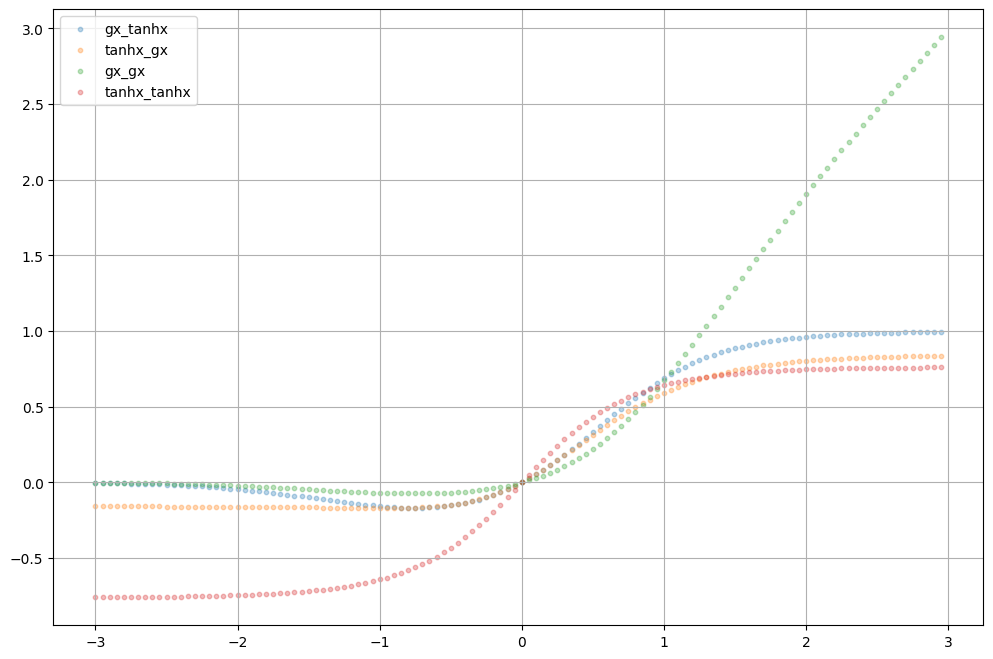

In [31]:
x = torch.arange(-3, 3, 5e-2)
# w = torch.randn(size=(40, 40))

# x = x @ w

gx = nn.GELU()(x)
tanhx = nn.Tanh()(x)

gx_tanhx = nn.Tanh()(gx)
tanhx_gx = nn.GELU()(tanhx)

gx_gx = nn.GELU()(gx)
tanhx_tanhx = nn.Tanh()(tanhx)

plt.figure(figsize=(12, 8))

# plt.scatter(x, gx, s=10, alpha=0.3)
# plt.scatter(x, tanhx, s=10, alpha=0.3)

plt.scatter(x, gx_tanhx, s=10, alpha=0.3, label="gx_tanhx")
plt.scatter(x, tanhx_gx, s=10, alpha=0.3, label="tanhx_gx")
plt.scatter(x, gx_gx, s=10, alpha=0.3, label="gx_gx")
plt.scatter(x, tanhx_tanhx, s=10, alpha=0.3, label="tanhx_tanhx")

plt.grid()
plt.legend(loc=2)
plt.show()

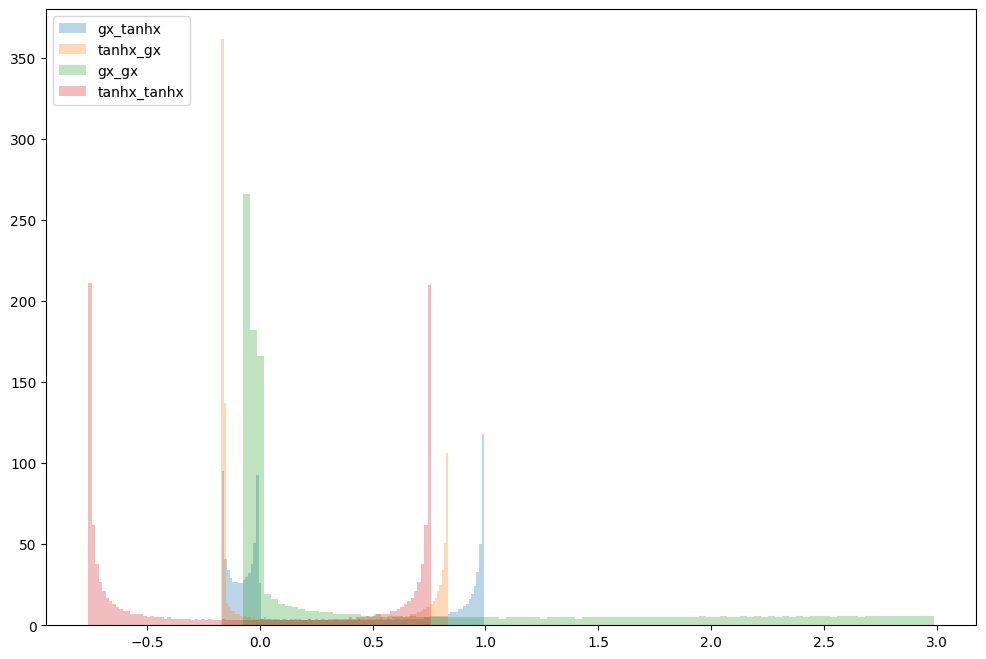

In [30]:
plt.figure(figsize=(12, 8))
plt.hist(gx_tanhx, bins=100, alpha=0.3, label="gx_tanhx")
plt.hist(tanhx_gx, bins=100, alpha=0.3, label="tanhx_gx")
plt.hist(gx_gx, bins=100, alpha=0.3, label="gx_gx")
plt.hist(tanhx_tanhx, bins=100, alpha=0.3, label="tanhx_tanhx")

plt.legend(loc=2)
plt.show()

# Serialize and compress data

In [2]:
sample = pd.read_parquet("./data/credits-history/train_data/train_data_0.pq")

    id – идентификатор заявки
    rn – порядковый номер кредитного продукта в кредитной истории
    pre_since_opened – дней с даты открытия кредита до даты сбора данных
    pre_since_confirmed – дней с даты подтверждения информации по кредиту до даты сбора данных
    pre_pterm – плановое количество дней с даты открытия кредита до даты закрытия
    pre_fterm – фактическое количество дней с даты открытия кредита до даты закрытия
    pre_till_pclose – плановое количество дней с даты сбора данных до даты закрытия кредита
    pre_till_fclose – фактическое количество дней с даты сбора данных до даты закрытия кредита
    pre_loans_credit_limit – кредитный лимит
    pre_loans_next_pay_summ – сумма следующего платежа по кредиту
    pre_loans_outstanding – оставшаяся невыплаченная сумма кредита
    pre_loans_total_overdue – текущая просроченная задолженность
    pre_loans_max_overdue_sum – максимальная просроченная задолженность
    pre_loans_credit_cost_rate – полная стоимость кредита
    pre_loans5 – число просрочек до 5 дней
    pre_loans530 – число просрочек от 5 до 30 дней
    pre_loans3060 – число просрочек от 30 до 60 дней
    pre_loans6090 – число просрочек от 60 до 90 дней
    pre_loans90 – число просрочек более, чем на 90 дней
    is_zero_loans_5 – флаг: нет просрочек до 5 дней
    is_zero_loans_530 – флаг: нет просрочек от 5 до 30 дней
    is_zero_loans_3060 – флаг: нет просрочек от 30 до 60 дней
    is_zero_loans_6090 – флаг: нет просрочек от 60 до 90 дней
    is_zero_loans90 – флаг: нет просрочек более, чем на 90 дней
    pre_util – отношение оставшейся невыплаченной суммы кредита к кредитному лимиту
    pre_over2limit – отношение текущей просроченной задолженности к кредитному лимиту
    pre_maxover2limit – отношение максимальной просроченной задолженности к кредитному лимиту
    is_zero_util – флаг: отношение оставшейся невыплаченной суммы кредита к кредитному лимиту равняется 0
    is_zero_over2limit – флаг: отношение текущей просроченной задолженности к кредитному лимиту равняется 0
    is_zero_maxover2limit – флаг: отношенение максимальной просроченной задолженности к кредитному лимиту равняется 0
    enc_paym_{0..n} – статусы ежемесячных платежей за последние n месяцев
    enc_loans_account_holder_type – тип отношения к кредиту
    enc_loans_credit_status – статус кредита
    enc_loans_account_cur – валюта кредита
    enc_loans_credit_type – тип кредита
    pclose_flag – флаг: плановое количество дней с даты открытия кредита до даты закрытия не определено
    fclose_flag – флаг: фактическое количество дней с даты открытия кредита до даты закрытия не определено**

In [5]:
sample_targets = pd.read_parquet("./data/credits-history/train_targets")

In [6]:
d(sample_targets)

,id,flag
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2999995,2999995,0
2999996,2999996,0
2999997,2999997,0
2999998,2999998,0


In [36]:
with open("./data/credits-history/train_targets/targets_dict.pickle", "wb") as f:
    pickle.dump(dict(zip(sample_targets["id"], sample_targets["flag"])), f)

In [2]:
sample_targets = pd.read_pickle("./data/credits-history/targets/targets_dict.pickle")

In [4]:
del sample_targets

In [5]:
d(sample.columns)

Index(['id', 'rn', 'pre_since_opened', 'pre_since_confirmed', 'pre_pterm',
       'pre_fterm', 'pre_till_pclose', 'pre_till_fclose',
       'pre_loans_credit_limit', 'pre_loans_next_pay_summ',
       'pre_loans_outstanding', 'pre_loans_total_overdue',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate', 'pre_loans5',
       'pre_loans530', 'pre_loans3060', 'pre_loans6090', 'pre_loans90',
       'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060',
       'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_over2limit',
       'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit',
       'is_zero_maxover2limit', 'enc_paym_0', 'enc_paym_1', 'enc_paym_2',
       'enc_paym_3', 'enc_paym_4', 'enc_paym_5', 'enc_paym_6', 'enc_paym_7',
       'enc_paym_8', 'enc_paym_9', 'enc_paym_10', 'enc_paym_11', 'enc_paym_12',
       'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16',
       'enc_paym_17', 'enc_paym_18', 'enc_paym_19', 'enc_paym_20',
       'enc_paym_21', 

In [34]:
d(sample["id"].drop_duplicates())

0               0
10              1
24              2
27              3
42              4
            ...  
1974673    249995
1974686    249996
1974709    249997
1974716    249998
1974721    249999
Name: id, Length: 250000, dtype: int64

In [7]:
d(sample[sample.columns[30:55]])

,enc_paym_0,enc_paym_1,enc_paym_2,enc_paym_3,enc_paym_4,enc_paym_5,enc_paym_6,enc_paym_7,enc_paym_8,enc_paym_9,...,enc_paym_15,enc_paym_16,enc_paym_17,enc_paym_18,enc_paym_19,enc_paym_20,enc_paym_21,enc_paym_22,enc_paym_23,enc_paym_24
0,0,0,3,3,3,3,3,3,3,3,...,3,3,3,3,3,4,3,3,3,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
3,1,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,4,3,3,3,4
4,0,0,0,0,0,0,0,3,3,3,...,3,3,3,3,3,4,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974719,0,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,4,3,3,3,4
1974720,0,0,0,0,0,3,3,3,3,3,...,3,3,3,3,3,4,3,3,3,4
1974721,0,0,0,0,0,0,0,0,3,3,...,3,3,3,3,3,4,3,3,3,4
1974722,0,0,0,0,0,0,0,0,0,3,...,3,3,3,3,3,4,3,3,3,4


In [84]:
def ema(x):
    ema_t = 0
    alpha = 2 / (len(x) + 1)

    for item in x[::-1]:
        ema_t = alpha * item + (1 - alpha) * ema_t
        

    return ema_t

In [57]:
d(ema(sample[sample.columns[30:55]].iloc[0]), sample[sample.columns[30:55]].iloc[0].mean())

2.209314965009924

2.88

In [64]:
d(sample[sample.columns[30:55]].apply(ema, axis=1))

0          2.209315
1          0.092472
2          0.092472
3          0.878115
4          1.366217
             ...   
1974719    0.712877
1974720    1.663633
1974721    1.234439
1974722    1.112798
1974723    1.112798
Length: 1974724, dtype: float64

In [66]:
sample["enc_paym_max"] = sample[sample.columns[30:55]].max(axis=1)

sample["enc_paym_avg"] = sample[sample.columns[30:55]].mean(axis=1)
sample["enc_paym_ema"] = sample[sample.columns[30:55]].apply(ema, axis=1)
sample["enc_paym_sin"] = np.sin(sample["enc_paym_ema"])
sample["enc_paym_cos"] = np.cos(sample["enc_paym_ema"])

# sample["enc_paym_1_to_8_max"] = sample[sample.columns[31:39]].max(axis=1)
# sample["enc_paym_1_to_8_sum"] = sample[sample.columns[31:39]].sum(axis=1)

# sample["enc_paym_9_to_16_max"] = sample[sample.columns[39:47]].max(axis=1)
# sample["enc_paym_9_to_16_sum"] = sample[sample.columns[39:47]].sum(axis=1)

# sample["enc_paym_17_to_24_max"] = sample[sample.columns[47:55]].max(axis=1)
# sample["enc_paym_17_to_24_sum"] = sample[sample.columns[47:55]].sum(axis=1)

sample.drop(sample.columns[30:55], axis=1, inplace=True)

In [68]:
sample["pre_diff_term"] = sample["pre_pterm"] - sample["pre_fterm"]
sample.drop(["pre_pterm", "pre_fterm"], axis=1, inplace=True)

In [70]:
sample["pre_diff_term_sign0"] = sample["pre_diff_term"].map(lambda x: x if x > 0 else 0)
sample["pre_diff_term_sign1"] = sample["pre_diff_term"].map(lambda x: abs(x) if x < 0 else 0)
sample.drop(["pre_diff_term"], axis=1, inplace=True)

In [98]:
def weighted_sum(x):
    return sum(x / np.array(range(1, len(x) + 1))[::-1])

In [102]:
d(weighted_sum(1 - sample[["is_zero_loans5", "is_zero_loans530", "is_zero_loans3060", "is_zero_loans6090", "is_zero_loans90"]].iloc[100]))

0.25

In [107]:
sample["pre_loans_ema"] = sample[
    ["pre_loans5", "pre_loans530", "pre_loans3060", "pre_loans6090", "pre_loans90"]
].apply(ema, axis=1)

sample["is_zero_loans_weighted_sum"] = (1 - sample[
    ["is_zero_loans5", "is_zero_loans530", "is_zero_loans3060", "is_zero_loans6090", "is_zero_loans90"]
]).apply(weighted_sum, axis=1)

sample.drop(
    [
        "is_zero_loans5", "is_zero_loans530", "is_zero_loans3060", "is_zero_loans6090", "is_zero_loans90",
        "pre_loans5", "pre_loans530", "pre_loans3060", "pre_loans6090", "pre_loans90"
    ], axis=1, inplace=True
)

In [108]:
d(sample.iloc[1])

id                                0.000000
rn                                2.000000
pre_since_opened                 18.000000
pre_since_confirmed               9.000000
pre_till_pclose                  12.000000
pre_till_fclose                  12.000000
pre_loans_credit_limit            0.000000
pre_loans_next_pay_summ           3.000000
pre_loans_outstanding             3.000000
pre_loans_total_overdue           0.000000
pre_loans_max_overdue_sum         2.000000
pre_loans_credit_cost_rate       11.000000
pre_util                         16.000000
pre_over2limit                    2.000000
pre_maxover2limit                17.000000
is_zero_util                      1.000000
is_zero_over2limit                1.000000
is_zero_maxover2limit             1.000000
enc_loans_account_holder_type     1.000000
enc_loans_credit_status           3.000000
enc_loans_credit_type             4.000000
enc_loans_account_cur             1.000000
pclose_flag                       0.000000
fclose_flag

In [109]:
sample.drop(["pre_since_confirmed", "pre_till_pclose", "pre_till_fclose", "enc_loans_account_cur", "pclose_flag", "fclose_flag"], axis=1, inplace=True)

In [110]:
d(sample.iloc[1])

id                                0.000000
rn                                2.000000
pre_since_opened                 18.000000
pre_loans_credit_limit            0.000000
pre_loans_next_pay_summ           3.000000
pre_loans_outstanding             3.000000
pre_loans_total_overdue           0.000000
pre_loans_max_overdue_sum         2.000000
pre_loans_credit_cost_rate       11.000000
pre_util                         16.000000
pre_over2limit                    2.000000
pre_maxover2limit                17.000000
is_zero_util                      1.000000
is_zero_over2limit                1.000000
is_zero_maxover2limit             1.000000
enc_loans_account_holder_type     1.000000
enc_loans_credit_status           3.000000
enc_loans_credit_type             4.000000
enc_paym_max                      4.000000
enc_paym_avg                      0.240000
enc_paym_ema                      0.092472
enc_paym_sin                      0.092341
enc_paym_cos                      0.995727
pre_diff_te

In [111]:
sample.drop("rn", axis=1, inplace=True)

In [112]:
d(sample)

,id,pre_since_opened,pre_loans_credit_limit,pre_loans_next_pay_summ,pre_loans_outstanding,pre_loans_total_overdue,pre_loans_max_overdue_sum,pre_loans_credit_cost_rate,pre_util,pre_over2limit,...,enc_loans_credit_type,enc_paym_max,enc_paym_avg,enc_paym_ema,enc_paym_sin,enc_paym_cos,pre_diff_term_sign0,pre_diff_term_sign1,pre_loans_ema,is_zero_loans_weighted_sum
0,0,18,11,3,3,0,2,11,16,2,...,4,4,2.88,2.209315,0.802980,-0.596007,0,1,7.218107,0.0
1,0,18,0,3,3,0,2,11,16,2,...,4,4,0.24,0.092472,0.092341,0.995727,0,0,7.218107,0.0
2,0,18,11,0,5,0,2,8,15,2,...,3,4,0.24,0.092472,0.092341,0.995727,0,4,7.218107,0.0
3,0,4,12,2,3,0,2,4,16,2,...,1,4,1.72,0.878115,0.769537,0.638603,0,3,7.218107,0.2
4,0,5,10,2,3,0,2,4,16,2,...,4,4,2.28,1.366217,0.979147,0.203155,13,0,7.218107,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1974719,249998,1,8,4,2,0,2,4,11,2,...,3,4,1.56,0.712877,0.654013,0.756483,6,0,7.218107,0.0
1974720,249998,7,19,1,4,0,2,7,7,2,...,4,4,2.52,1.663633,0.995694,-0.092703,0,4,7.218107,0.0
1974721,249999,9,16,2,3,0,2,7,16,2,...,3,4,2.16,1.234439,0.943963,0.330051,2,0,7.218107,0.0
1974722,249999,9,12,2,3,0,2,7,16,2,...,3,4,2.04,1.112798,0.896939,0.442154,0,3,7.218107,0.0


In [122]:
features_dict = {
    "numerical": [
        col for col in sample.columns[1:] if sample[col].dtype not in (np.int64, np.int32)
    ],
    "categorical": {
        col: max(sample[col]) + 1 for col in sample.columns[1:] if sample[col].dtype in (np.int64, np.int32)
    }
}

In [123]:
d(features_dict)

{'numerical': ['enc_paym_avg',
  'enc_paym_ema',
  'enc_paym_sin',
  'enc_paym_cos',
  'pre_loans_ema',
  'is_zero_loans_weighted_sum'],
 'categorical': {'pre_since_opened': 20,
  'pre_loans_credit_limit': 20,
  'pre_loans_next_pay_summ': 7,
  'pre_loans_outstanding': 6,
  'pre_loans_total_overdue': 1,
  'pre_loans_max_overdue_sum': 4,
  'pre_loans_credit_cost_rate': 14,
  'pre_util': 20,
  'pre_over2limit': 20,
  'pre_maxover2limit': 20,
  'is_zero_util': 2,
  'is_zero_over2limit': 2,
  'is_zero_maxover2limit': 2,
  'enc_loans_account_holder_type': 7,
  'enc_loans_credit_status': 7,
  'enc_loans_credit_type': 6,
  'enc_paym_max': 5,
  'pre_diff_term_sign0': 18,
  'pre_diff_term_sign1': 17}}

In [124]:
OmegaConf.save(OmegaConf.create(features_dict), "configs/data/features/features_credits_aggregated_v2.yaml")

In [127]:
features_dict = OmegaConf.load("configs/data/features/features_credits_aggregated_v2.yaml")

In [129]:
import lz4
import lz4.frame

In [130]:
def serialize_and_compress(item: Dict):
    serialized_item = pickle.dumps(item)
    compressed = lz4.frame.compress(serialized_item)
    return compressed

def deserialize_and_decompress(item):
    decompressed = lz4.frame.decompress(item)
    deserialized = pickle.loads(decompressed)
    return deserialized


class DiskFile:
    def __init__(self, data_path: str, indexes_path: str):
        self.data_path = data_path
        self.indexes_path = indexes_path

        with open(self.indexes_path, "rb") as indexes:
            self.indexes = deserialize_and_decompress(indexes.read())

        self.data = open(data_path, "rb")
            

    def __getitem__(self, idx):
        memory_position, sizeof = self.indexes[idx]
        self.data.seek(memory_position)
        
        item = deserialize_and_decompress(self.data.read(sizeof))
        
        return item

In [131]:
def preprocess_part(left_id: int, right_id: int):
    sample_batch = sample.query(f"id >= {left_id} and id < {right_id}")

    sample_batch_collected = sample_batch.groupby("id").agg(pd.Series.tolist)
    sample_batch_collected["length"] = sample_batch_collected[sample_batch_collected.columns[0]].map(lambda x: len(x))

    result = list()
    for idx in sample_batch_collected.index:
        result.append({"id": idx, "features_array": serialize_and_compress(dict(sample_batch_collected.loc[idx]))})

    return result

In [132]:
batch_size = 10_000
n_batches = max(sample["id"]) // 10_000 + 1

path_to_dir = "./data/credits-history/serialized/serialized_first_part_v2"

file_indices = dict()

with open(path_to_dir + "/data.txt", "wb") as output:
    for i in tqdm(range(n_batches), ncols=80):
        preprocessed = preprocess_part(batch_size * i, batch_size * i + batch_size)

        for record in preprocessed:
            item = record["features_array"]
            file_indices[str(record["id"])] = (output.tell(), sys.getsizeof(item))
            output.write(item)


with open(path_to_dir + "/index.txt", "wb") as output:
    output.write(serialize_and_compress(file_indices))

100%|███████████████████████████████████████████| 25/25 [03:26<00:00,  8.24s/it]


# Dataloader sample & model step

In [2]:
from src.data.components.dataset import CustomDataset
from src.data.components.targets_indexes_reader import TargetsReader, IndexesReader
from src.data.components.data_reader import DataReader
from src.data.components.collate import BaseCollator, ModelBatch

from src.models.tabnn import TabularRNNLitModule

In [3]:
features_dict = OmegaConf.load("configs/data/features/features_credits_aggregated.yaml")

In [4]:
data_reader = DataReader(data_path="./data/credits-history/serialized/ser_full_0")
data_reader.setup()

In [5]:
boosting_dataset = CustomDataset(
    data=data_reader, 
    targets=TargetsReader("./data/credits-history/targets/targets_dict.pickle").targets,
    indexes=IndexesReader(train_path="./data/credits-history/indexes/ser_full_0_indexes/train_indexes.pickle").train_indexes,
    categorical_features=features_dict
)

In [6]:
d(boosting_dataset[0])

{'categorical': tensor([[ 7, 13,  2,  4,  1, 12,  2,  3,  2,  4,  0,  1,  3,  4,  1,  0,  0,  0,
           0,  4, 22,  4, 26,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 7,  8, 11,  4,  1,  6,  2,  3,  2,  4,  0,  1,  3,  4,  1,  0,  0,  3,
          18,  4, 25,  4, 26,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 7,  7,  6,  9,  1, 19,  2,  3,  2,  4,  0,  1,  3,  4,  1,  0,  0,  3,
           9,  4, 25,  4, 26,  0,  0,  0,  0,  0,  0,  0,  0],
         [17,  8,  6,  9,  1, 19,  2,  3,  2,  4,  0,  1,  3,  1,  1,  0,  0,  3,
           9,  4, 25,  4, 26,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 9,  9, 11,  6, 13,  1,  4,  3,  2,  5,  0,  1,  3,  4,  1,  0,  0,  3,
          12,  4, 25,  4, 26,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 9,  4, 10,  1,  5, 17,  4,  3,  2,  7,  0,  1,  3,  3,  1,  1,  0,  0,
           0,  1,  1,  4, 11,  0,  0,  0,  0,  0,  0,  0,  0],
         [ 9,  4, 15,  1, 10,  8,  3,  3,  2,  7,  3,  1,  3,  3,  1,  1,  0,  3,
          24,  4, 25,  4, 26,  0,

In [7]:
sample = BaseCollator(max_seq_len=50)([boosting_dataset[idx] for idx in range(10)])

In [8]:
d(sample)

ModelBatch(categorical=tensor([[[ 7, 13,  2,  ...,  0,  0,  0],
         [ 7,  8, 11,  ...,  0,  0,  0],
         [ 7,  7,  6,  ...,  0,  0,  0],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0]],

        [[17,  9, 12,  ...,  0,  0,  0],
         [ 3, 16,  6,  ...,  0,  0,  0],
         [12, 11, 11,  ...,  0,  0,  0],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0]],

        [[ 2, 11,  8,  ...,  0,  0,  0],
         [ 2, 11, 13,  ..., 18,  0,  0],
         [ 2,  7,  6,  ..., 11,  0,  0],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0],
         [ 0,  0,  0,  ...,  0,  0,  0]],

        ...,

        [[14, 12, 15,  ...,  0,  0,  0],
         [ 8,  6, 16,  ...,  0,  0,  0],
         [12,  0, 13,  ...,  0,  0,  0],
         ...,
         [ 0,  0,  0,  ...,  0,  0,  0],

In [9]:
d(sample.targets.size())

torch.Size([10, 1])

In [10]:
d(ModelBatch(
    categorical=torch.zeros(size=(1, 50, 31), dtype=torch.float),
    targets=torch.zeros(size=(1, 1), dtype=torch.float),
    sample_indexes=[" " for _ in range(1)],
    mask=torch.zeros(size=(1, ), dtype=torch.bool)
))

ModelBatch(categorical=tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), targets=tensor([[0.]]), sample_indexes=[' '], mask=tensor([False]))

In [11]:
class PredictLitModel:
    def __init__(self, ckpt_path: str):
        trained_model = TabularRNNLitModule.load_from_checkpoint(ckpt_path)
        trained_model.eval()
        trained_model.freeze()

        self.net = trained_model

    def predict(self, sample):
        return self.net(sample)

In [12]:
model = PredictLitModel(
    "/home/danil/projects/torch_template/nfs/samples_RNN/LHT_credits-history/logs/train/runs/2024-03-30_23-16-50/checkpoints/epoch_003.ckpt"
)

In [13]:
d(model.net)

TabularRNNLitModule(
  (net): SequentialLitModel(
    (layers): Sequential(
      (0): EncoderLayer(
        (dropout): Dropout(p=0.3, inplace=False)
        (embeddings): EmbeddingLayer(
          (embeddings): ModuleList(
            (0-1): 2 x Embedding(18, 32)
            (2-3): 2 x Embedding(17, 32)
            (4): Embedding(16, 32)
            (5): Embedding(20, 32)
            (6): Embedding(7, 32)
            (7): Embedding(6, 32)
            (8): Embedding(4, 32)
            (9): Embedding(14, 32)
            (10): Embedding(4, 32)
            (11-12): 2 x Embedding(7, 32)
            (13): Embedding(6, 32)
            (14): Embedding(4, 32)
            (15-16): 2 x Embedding(2, 32)
            (17): Embedding(4, 32)
            (18): Embedding(25, 32)
            (19): Embedding(5, 32)
            (20): Embedding(26, 32)
            (21): Embedding(5, 32)
            (22): Embedding(27, 32)
            (23): Embedding(7, 32)
            (24): Embedding(19, 32)
            (2

In [20]:
from sklearn.metrics import classification_report

In [15]:
d(model.predict(sample))

ModelOutput(preds=tensor([[-0.1699],
        [ 0.6547],
        [ 1.5091],
        [ 1.2857],
        [-0.1645],
        [-0.1696],
        [ 1.4894],
        [-0.1699],
        [-0.1370],
        [ 1.2811]]))

In [19]:
model.net.to_onnx(
    file_path="tests/gru_all_poolings_model.onnx", 
    input_sample=ModelBatch(
        categorical=torch.zeros(size=(1, 50, 31), dtype=torch.float),
        targets=torch.zeros(size=(1, 1), dtype=torch.float),
        sample_indexes=[" " for _ in range(1)],
        mask=torch.zeros(size=(1, ), dtype=torch.bool)
    ),
    export_params=True,
    input_names=["ModelBatch"],
    use_external_data_format=True
)

TypeError: export() got an unexpected keyword argument 'use_external_data_format'

In [ ]:
sample = DiskFile(
    data_path="./data/credits-history/serialized/ser_full_0/data.txt", 
    indexes_path="./data/credits-history/serialized/ser_full_0/index.txt"
)

In [ ]:
indexes = np.asarray(list(sample.indexes.keys()), dtype=str)

In [20]:
d(max([sample[idx]["length"] for idx in indexes]))

51

## make indexes

In [107]:
d(int(0.99 * len(indexes)))

247500

In [103]:
train_indexes = np.random.choice(indexes, size=int(0.99 * len(indexes)), replace=False)

In [104]:
valid_indexes = indexes[~np.isin(indexes, train_indexes)]

In [108]:
with open("./data/credits-history/indexes/ser_full_0_indexes/train_indexes.pickle", "wb") as output:
    pickle.dump(train_indexes.astype(str).tolist(), output)

In [109]:
with open("./data/credits-history/indexes/ser_full_0_indexes/valid_indexes.pickle", "wb") as output:
    pickle.dump(valid_indexes.astype(str).tolist(), output)

In [9]:
new_indexes = {str(key): item for key, item in sample.indexes.items()}

In [11]:
with open("./data/credits-history/serialized/index_new.txt", "wb") as output:
    output.write(serialize_and_compress(new_indexes))

In [9]:
d(sample.indexes.__len__())

100000

In [23]:
!du -h ./data/credits-history/serialized/ser_100k_first/

109M	./data/credits-history/serialized/ser_100k_first/


## check custom dataset

In [22]:
features_dict = OmegaConf.load("configs/data/features/features_credits_aggregated.yaml")

In [23]:
data_reader = DataReader(data_path="./data/credits-history/serialized/ser_full_0")
data_reader.setup()

In [24]:
sample_dataset = CustomDataset(
    data=data_reader, 
    targets=TargetsReader("./data/credits-history/targets/targets_dict.pickle").targets,
    indexes=IndexesReader(train_path="./data/credits-history/indexes/ser_full_0_indexes/train_indexes.pickle").train_indexes,
    categorical_features=features_dict
)

In [11]:
d(np.asarray(list(sample_dataset.data.disk_file_data.indexes.keys())))

array(['0', '1', '2', ..., '99997', '99998', '99999'], dtype='<U5')

In [16]:
d(sample_dataset[89999])

{'categorical': [[0, 0, 18, 4, 17, 17, 17, 17, 19, 19],
  [5, 0, 8, 1, 1, 3, 1, 17, 9, 9],
  [6, 6, 15, 15, 7, 9, 15, 15, 4, 4],
  [1, 1, 12, 12, 6, 0, 9, 12, 8, 8],
  [0, 0, 5, 16, 16, 11, 11, 11, 1, 1],
  [4, 4, 7, 12, 12, 0, 0, 0, 11, 11],
  [2, 2, 13, 3, 5, 18, 12, 12, 16, 3],
  [2, 2, 2, 2, 2, 2, 2, 1, 3, 4],
  [1, 1, 3, 3, 3, 3, 3, 3, 2, 3],
  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
  [11, 11, 4, 9, 6, 4, 1, 4, 9, 5],
  [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
  [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [18, 3, 16, 16, 16, 16, 16, 16, 6, 5],
  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
  [17, 17, 17, 17, 17, 17, 17, 17, 17, 17],
  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [0, 0, 

In [41]:
%timeit sample_dataset[0]

69.5 µs ± 2.74 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [78]:
d(torch.as_tensor(sample_dataset[0]["categorical"]).size())

torch.Size([58, 10])

In [191]:
from abc import ABC
from typing import List, Dict

from dataclasses import dataclass


# abstract class for model batches (data type)
# returns class with __init__, __repr__ and other
@dataclass
class ModelBatch:
    categorical: Optional[torch.Tensor]
    targets: Optional[torch.Tensor]
    sample_indexes: Optional[List]
    mask: Optional[torch.Tensor]


# abstract class for model input (data type)
@dataclass
class ModelInput:
    numerical: Optional[torch.Tensor]
    categorical: Optional[torch.Tensor]


# abstract class for model output (data type)
@dataclass
class ModelOutput:
    preds: Dict[str, torch.Tensor]


class Collator(ABC):
    def __call__(self, batch: List[Dict]) -> ModelBatch:
        raise NotImplementedError


class BaseCollator(Collator):
    def __init__(self, max_seq_len: int = None):
        self.max_seq_len = max_seq_len

    def get_padded_tensors(self, data: List[Dict], field: str):
        features = [torch.as_tensor(item[field]).permute(1, 0) for item in data]
        lengths = torch.as_tensor([len(item) for item in features]).unsqueeze(dim=-1)

        padded_features = nn.utils.rnn.pad_sequence(features, batch_first=True).type(torch.long) # size(batch_size, max_seq_len, num_features = num_sequences) 

        if self.max_seq_len is not None:
            padded_features = nn.functional.pad(
                padded_features, (0, 0, 0, self.max_seq_len - padded_features.size(1))
            ) # size(batch_size, new max_seq_len, num_features)
            
            mask = torch.arange(self.max_seq_len).unsqueeze(dim=0) >= lengths
        else:
            mask = torch.arange(padded_features.size(1)).unsqueeze(dim=0) >= lengths

        return padded_features, mask
    

    def __call__(self, batch: List[Dict]) -> ModelBatch:
        categorical_features, mask = self.get_padded_tensors(batch, "categorical")

        targets = torch.as_tensor([item["target"] for item in batch], dtype=torch.float32).unsqueeze(dim=-1)
        sample_indexes = [item["sample_index"] for item in batch]

        return ModelBatch(
            categorical=categorical_features, 
            targets=targets,
            sample_indexes=sample_indexes,
            mask=mask
        )

In [192]:
sample_raw_batch = [sample_dataset[idx] for idx in range(128)]

In [193]:
sample_batch = BaseCollator(30)(batch=sample_raw_batch)

In [194]:
d(sample_batch.categorical.size())

torch.Size([128, 30, 58])

In [204]:
class EmbeddingLayer(nn.Module):
    def __init__(
            self,
            categorical_features: dict,
            embedding_dim: int = 32
        ) -> None:
        super(EmbeddingLayer, self).__init__()

        self.categorical_features = categorical_features

        self.embeddings = nn.ModuleList()

        for num_embs in self.categorical_features.values():
            embedding = nn.Embedding(num_embeddings=num_embs, embedding_dim=embedding_dim)

            nn.init.xavier_normal_(embedding.weight, gain=nn.init.calculate_gain('relu'))

            self.embeddings.append(embedding)


    def forward(self, inputs: ModelInput) -> torch.Tensor:
        x = inputs.categorical
        
        x = torch.concatenate(
            [embedding(x[..., idx]) for idx, embedding in enumerate(self.embeddings)], dim=-1
        ) # size = (batch_size, len(cat_features), embedding_dim)
        
        return x

In [205]:
emb_layer = EmbeddingLayer(categorical_features=features_dict)
d(emb_layer(sample_batch).size())

torch.Size([128, 30, 1856])

In [206]:
class EncoderLayer(nn.Module):
    def __init__(
            self,
            categorical_features: dict,
            embedding_dim: int = 32,
            dropout_inputs: float = 0.5
        ) -> None:
        super(EncoderLayer, self).__init__()

        self.dropout = nn.Dropout(p=dropout_inputs)

        self.categorical_features = categorical_features

        self.embeddings = EmbeddingLayer(
            categorical_features=categorical_features,
            embedding_dim=embedding_dim
        )

        self.out_linear_block = nn.Sequential(
            nn.Linear(in_features=embedding_dim * len(self.categorical_features), out_features=embedding_dim),
            nn.ReLU(),

            nn.Linear(in_features=embedding_dim, out_features=embedding_dim),
            nn.ReLU()
        )

    def forward(self, inputs: ModelInput) -> torch.Tensor:
        x = self.dropout(self.embeddings(inputs))

        return self.out_linear_block(x)

In [208]:
enc_layer = EncoderLayer(categorical_features=features_dict)
d(enc_layer(sample_batch).size())

torch.Size([128, 30, 32])

In [52]:
model = DenseFeatures(
    encoder_layer=EncoderLayer(
        numerical_features=features["numerical_features"], 
        categorical_features=features["categorical_features"]
    ),
    decoder_layer=DecoderLayer(
        input_size=27,
        num_sequences=9,
        hidden_size=32
    )
)

In [14]:
a = CustomDataset(data_path="./data/train.csv", indexes_path="./data/all_indexes.pickle")

In [15]:
d(a.indices)

array(['0001_01', '0002_01', '0003_01', ..., '9279_01', '9280_01',
       '9280_02'], dtype=object)

In [16]:
a.__getitem__(a.indices[0])

{'numerical': array([ 0.71194537, -0.35550368, -0.29537399, -0.34747284, -0.29078296,
        -0.27796014, -0.12177355, -0.46649859, -0.48766844, -0.29790077,
        -0.45796362]),
 'categorical': {'HomePlanet': 1.0,
  'CryoSleep': 0.0,
  'Destination': 2.0,
  'VIP': 0.0,
  'Deck': 1.0,
  'Side': 0.0,
  'min_home_cryo_dest': 0.0,
  'max_home_cryo_dest': 2.0,
  'sum_home_cryo_dest': 3.0},
 'target': array([0], dtype=int64)}

In [17]:
d(
    a.indices[:int(a.indices.__len__() * 0.7)].__len__(), 
    a.indices[int(a.indices.__len__() * 0.7):int(a.indices.__len__() * 0.7) + int(a.indices.__len__() * 0.15)].__len__(),
    a.indices[int(a.indices.__len__() * 0.85):].__len__()
)

6085

1303

1304

In [18]:
train_indexes = a.indices[:int(a.indices.__len__() * 0.7)]

b = torch.utils.data.DataLoader(
    dataset=a,
    batch_size=128,
    num_workers=0,
    pin_memory=False,
    collate_fn=BaseCollator(),
    sampler=SequentialSampler(train_indexes)
)

In [19]:
next(iter(b)).targets.size()

torch.Size([128, 1])

In [8]:
eval("32 + 32 * True")

64

In [53]:
d(model(next(iter(b))).size())

torch.Size([128, 9, 32])

In [76]:

pooling_model = nn.Sequential(nn.AvgPool1d(kernel_size=32))
d(pooling_model(model(next(iter(b)))).size())

torch.Size([128, 9, 1])

In [49]:
from sklearn.metrics import roc_auc_score

In [52]:
d(torch.load("logs/train/runs/2024-01-30_10-41-13/lightning_logs/version_0/checkpoints/epoch=9-step=480.ckpt")["state_dict"])

OrderedDict([('net.autoencoder.0.embeddings.HomePlanet.weight',
              tensor([[ 0.3472, -0.9230,  1.1947, -0.5324, -0.8266, -0.2866, -0.5537, -0.3616,
                        1.2765, -0.2821,  0.1512,  1.3632,  0.5193, -1.9376,  1.2045,  0.4826],
                      [-0.5543,  0.6432,  0.8365, -0.2437, -0.6499,  1.7851,  0.1800,  0.5953,
                        0.1773, -1.8257,  2.1390,  1.0564, -0.1123,  1.2255, -1.6390, -0.2437],
                      [ 1.3913,  0.2085, -0.1476, -0.4428,  0.3348, -0.1322,  1.4858, -0.4617,
                        1.4903, -0.3751, -0.7065,  0.1347,  0.2712, -1.3041,  1.1434, -0.3234]])),
             ('net.autoencoder.0.embeddings.CryoSleep.weight',
              tensor([[-1.2999, -1.3155,  2.0355,  0.1081,  1.3019, -0.6312,  0.6594, -0.8516,
                        0.4310, -1.0083,  0.6621,  0.8406, -0.4692,  1.0707, -0.1824, -1.1178],
                      [ 0.3842,  1.7874,  1.5249, -0.7527,  0.6291, -0.5546, -0.0560, -0.7182,
           

In [48]:
nn.BCELoss()(model(next(iter(b)))[0], next(iter(b)).targets)

tensor(0.7235, grad_fn=<BinaryCrossEntropyBackward0>)

In [22]:
d(a.indices[data_train.indices])

array(['4255_01', '0944_01', '7996_01', ..., '3478_01', '2015_01',
       '1663_01'], dtype=object)

In [47]:
torch.as_tensor(a.features[a.num_cols].values, dtype=torch.float16).size()

torch.Size([8693, 11])

In [54]:
a.features.loc[0][a.num_cols]

Age                      0.711945
RoomService             -0.355504
FoodCourt               -0.295374
ShoppingMall            -0.347473
Spa                     -0.290783
VRDeck                  -0.277960
min_shop_food_room      -0.121774
max_shop_food_room      -0.466499
avg_shop_food_room      -0.487668
median_shop_food_room   -0.297901
std_shop_food_room      -0.457964
Name: 0, dtype: float64

In [56]:
sample_embs = nn.Embedding(3, 16)(torch.as_tensor(a.features["HomePlanet"]))
d(sample_embs.size())

torch.Size([8693, 16])

In [21]:
d(sample_embs[:, 0].size())

torch.Size([8693])

In [42]:
sample_embs

tensor([[ 0.7030, -0.1556,  1.0966,  ...,  1.6845,  0.8240,  2.4319],
        [ 0.1966,  2.2820,  0.0519,  ..., -0.1745,  0.5623,  0.6676],
        [ 0.7030, -0.1556,  1.0966,  ...,  1.6845,  0.8240,  2.4319],
        ...,
        [ 0.1966,  2.2820,  0.0519,  ..., -0.1745,  0.5623,  0.6676],
        [ 0.7030, -0.1556,  1.0966,  ...,  1.6845,  0.8240,  2.4319],
        [ 0.7030, -0.1556,  1.0966,  ...,  1.6845,  0.8240,  2.4319]],
       grad_fn=<EmbeddingBackward0>)

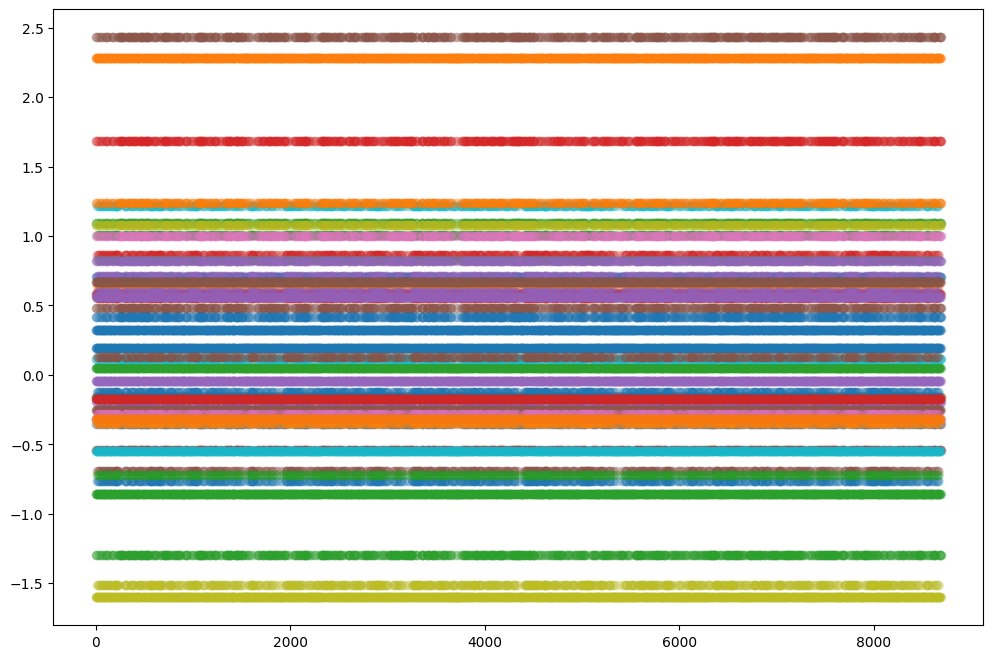

In [41]:
ax = plt.figure(figsize=(12, 8)).add_subplot()

for idx in range(sample_embs.size(-1)):
    ax.scatter(range(8693), sample_embs[:, idx].detach(), alpha=0.1)